In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Visualizing the Dataset

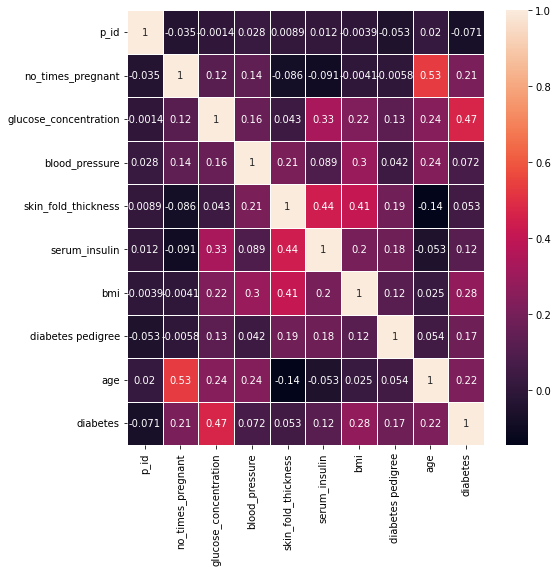

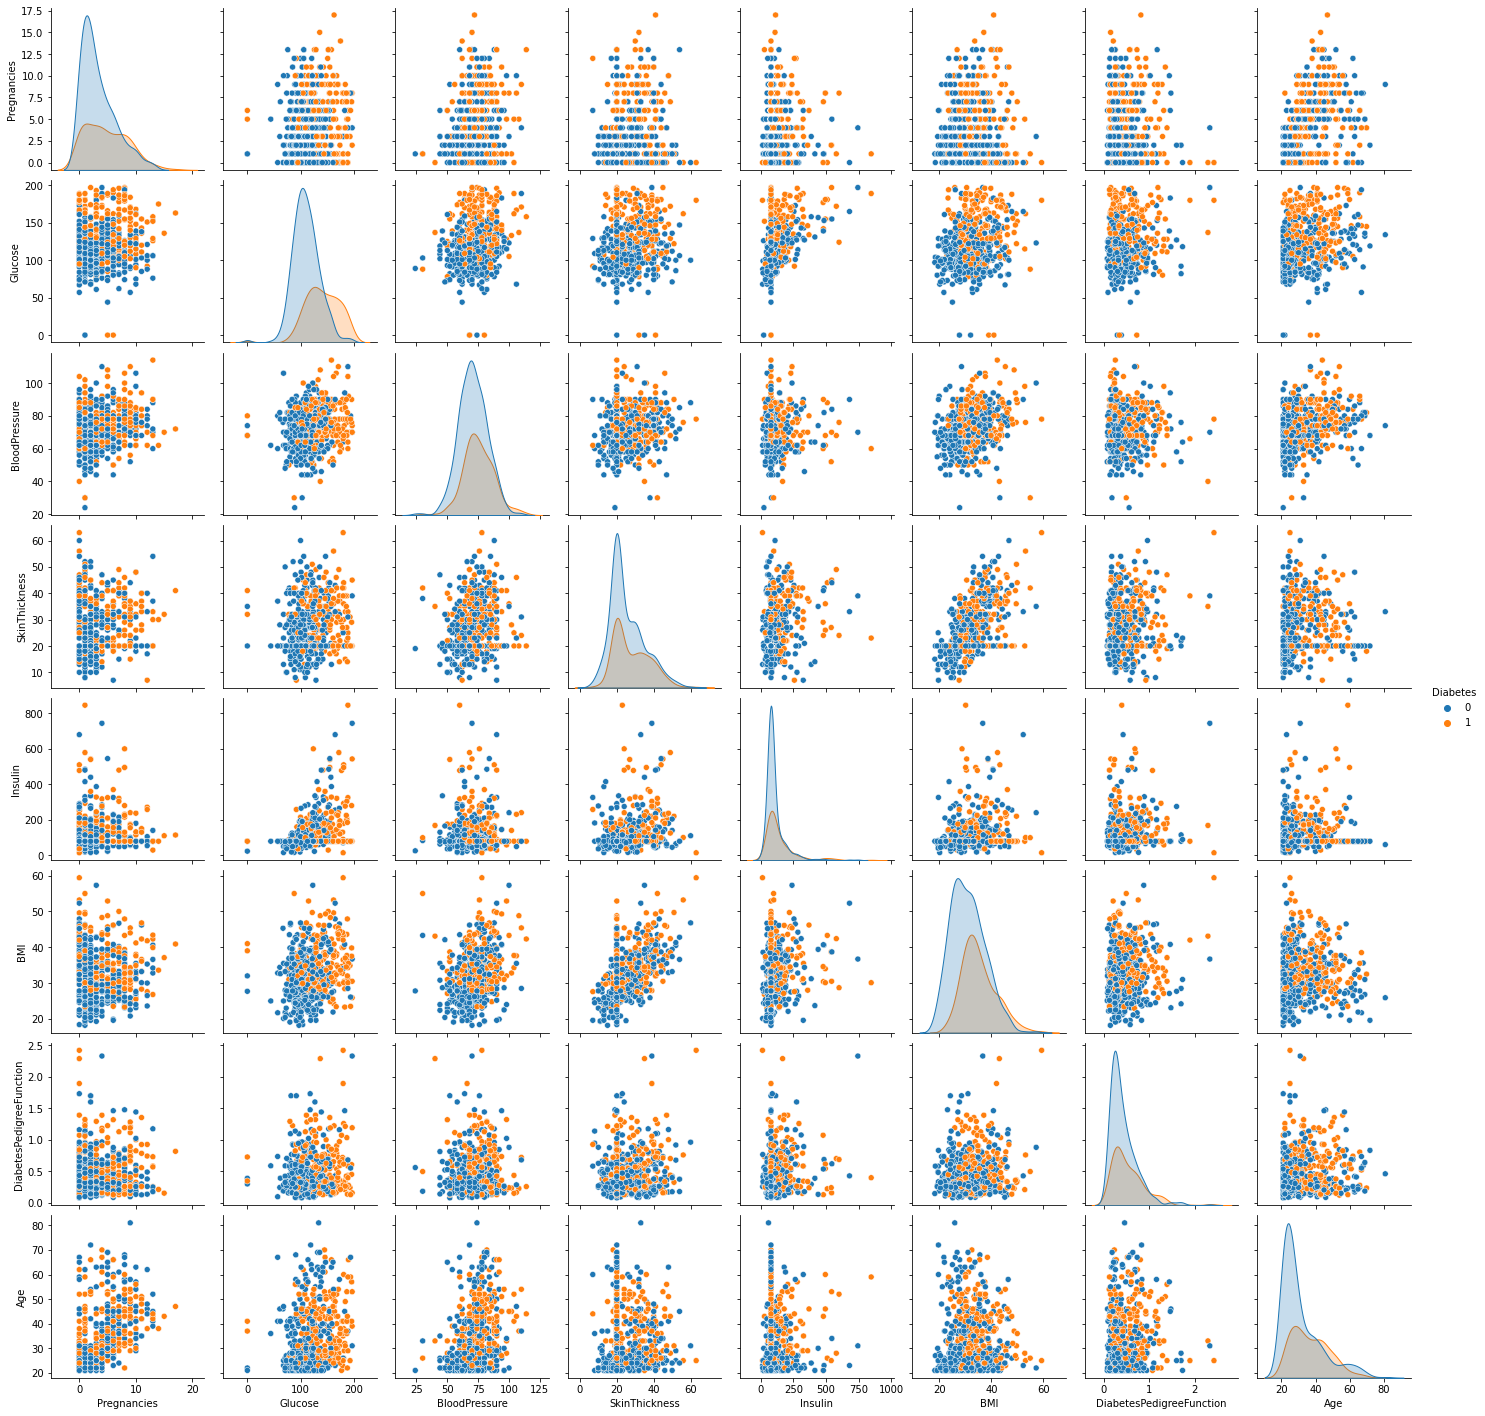

In [2]:
dataRaw = pd.read_csv("train.csv")
dataSet = dataRaw.drop(columns = ["p_id"])
dataSet.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age", "Diabetes"]

names = list(dataSet.columns)

zero_not_accepted = ["BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]
for column in zero_not_accepted:
    mean = int(dataSet[column].mean(skipna=True))
    dataSet[column] = dataSet[column].replace(0, mean)

X = dataSet.iloc[:,0:2].values
Y = dataSet.iloc[:,8].values

fig, axs = plt.subplots(figsize=(8,8))
sns.heatmap(data = dataRaw.corr(), annot=True, linewidths=0.5)
sns.pairplot(dataSet, hue = "Diabetes")

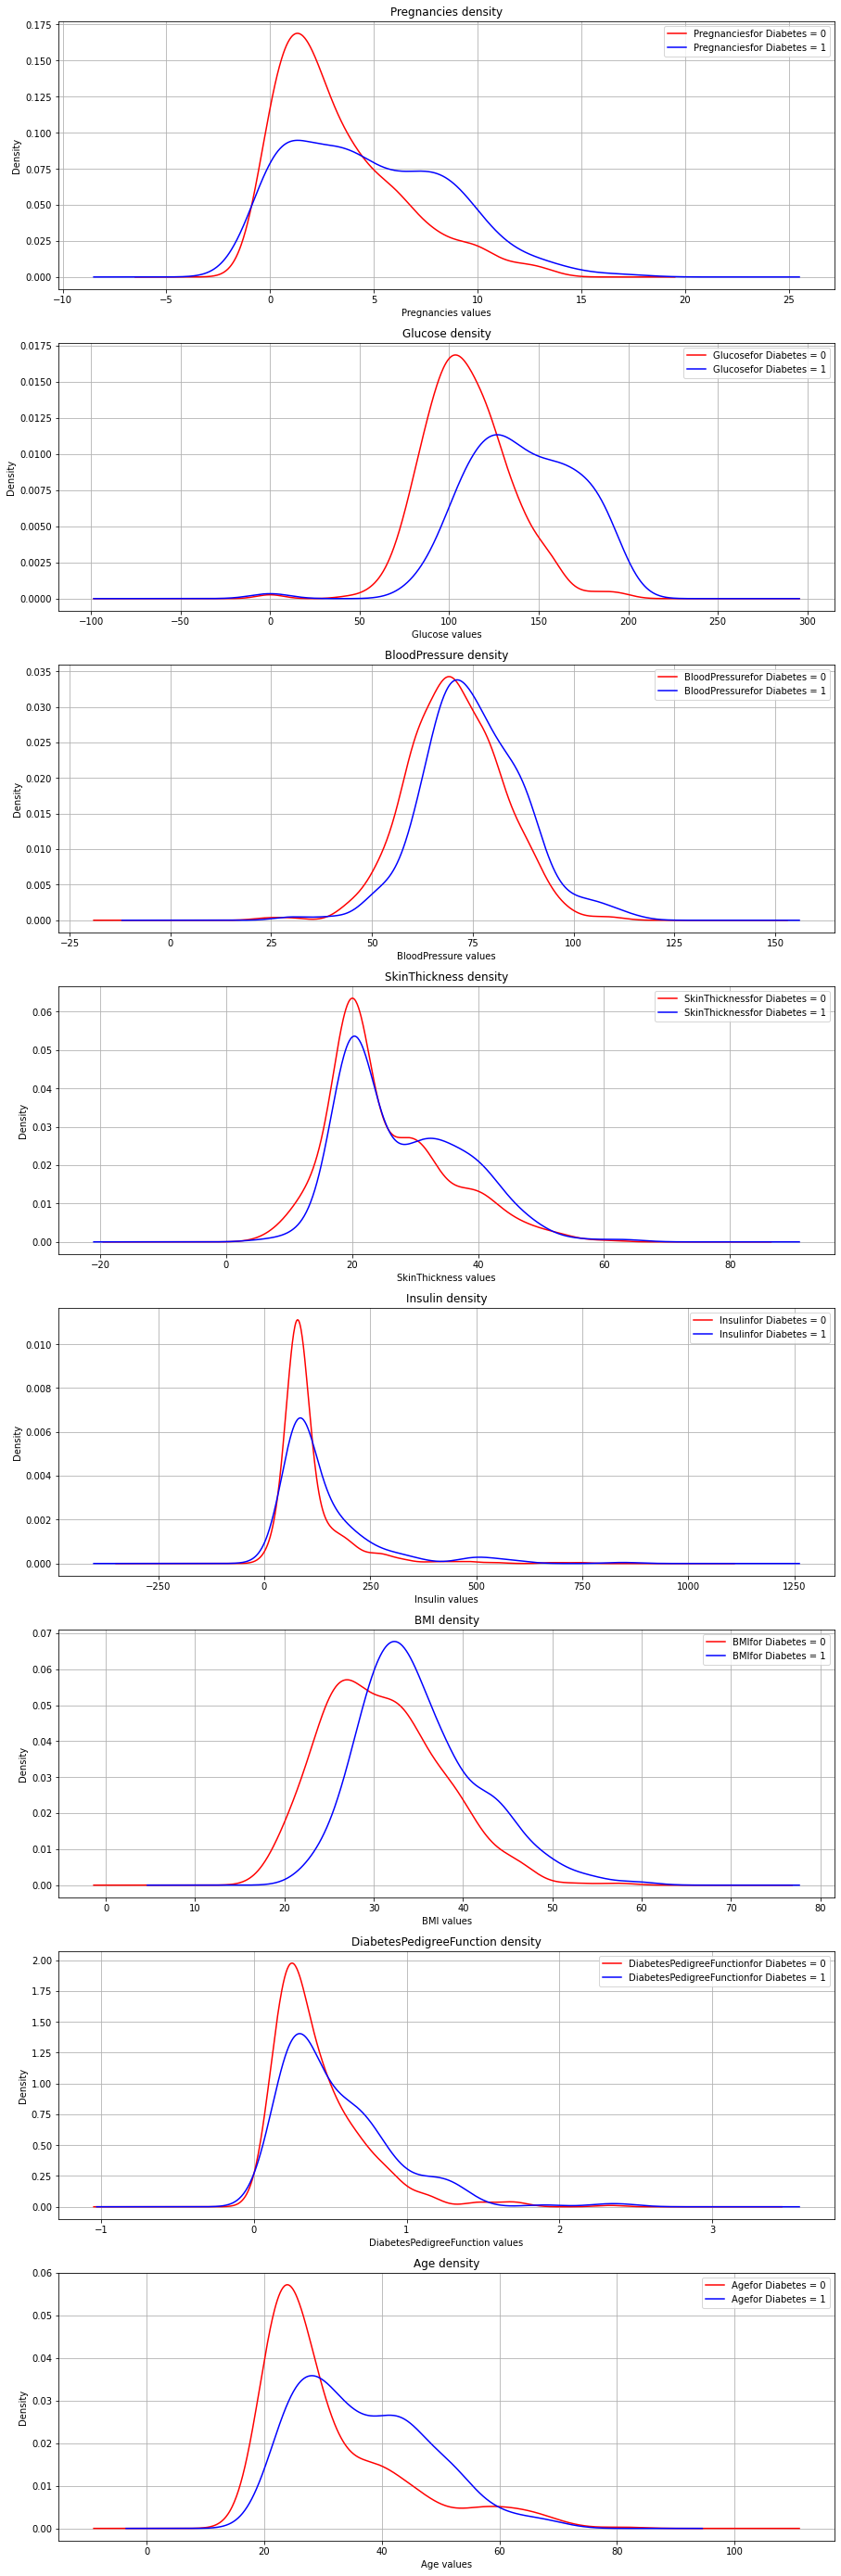

In [3]:
diabetesNegative = dataSet[dataSet["Diabetes"] == 0]
diabetesPositive = dataSet[dataSet["Diabetes"] == 1]

fig, axs = plt.subplots(8,1, figsize = (15,50))
for columnName in names[:-1]:
    ax = axs[names.index(columnName)]
    diabetesNegative[columnName].plot(kind = "density", sharex = False, color = "red", legend = True, subplots =True, label = columnName + 'for Diabetes = 0',ax = ax)
    diabetesPositive[columnName].plot(kind = "density", sharex = False, color = "blue", legend = True, subplots =True, label = columnName + 'for Diabetes = 1', ax = ax)
    ax.set_xlabel(columnName + ' values')
    ax.set_title(columnName + ' density')
    ax.grid('on')
plt.show()

Classification Models - KNN, Logistic Regression, and Random Forest

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=41, test_size=0.10)

KNeighborsClassifier
****Result****
Accuracy: 75.81
f1 Score:  0.65
LogisticRegression
****Result****
Accuracy: 82.26
f1 Score:  0.72
RandomForestClassifier
****Result****
Accuracy: 79.03
f1 Score:  0.67


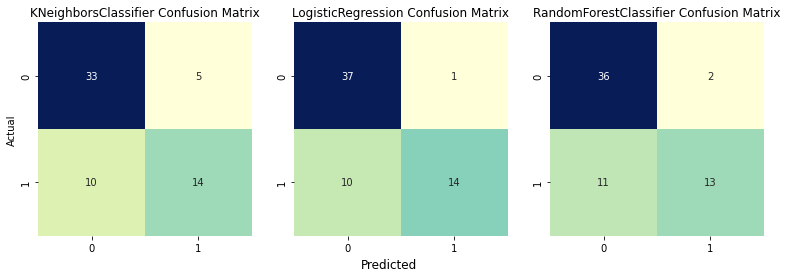

In [5]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(13,4))
f.supxlabel('Predicted')
i=1
def plotConfusionMatrix(name, yTest, pred,i):
    confusionMatrix = confusion_matrix(yTest, pred)
    confusionMatrix = pd.DataFrame(data = confusionMatrix)
    if i == 1:
        KNN = sns.heatmap(confusionMatrix, annot = True, cmap ="YlGnBu", square = True, cbar = False, ax = ax1, fmt = 'g')
        ax1.set_title(name + ' Confusion Matrix')
        ax1.set_ylabel('Actual')
    elif i == 2:
        LR = sns.heatmap(confusionMatrix, annot = True, cmap = "YlGnBu", square = True, cbar = False, ax = ax2, fmt = 'g')
        ax2.set_title(name + ' Confusion Matrix')
    else:
        RFC = sns.heatmap(confusionMatrix, annot = True, cmap = "YlGnBu", square = True, cbar = False, ax = ax3, fmt = 'g')
        ax3.set_title(name + ' Confusion Matrix')

classifiers = [KNeighborsClassifier(3), LogisticRegression(), RandomForestClassifier(max_depth=5, min_samples_split=3)]
for clf in classifiers:
    clf.fit(xTrain, yTrain)
    name = clf.__class__.__name__
    print('='*30)
    print(name)
    print('****Result****')
    pred = clf.predict(xTest)
    accuracy = round((accuracy_score(yTest,pred)*100),2)
    f1Score = round(f1_score(yTest, pred),2)
    plotConfusionMatrix(name, yTest, pred, i)
    i = i+1
    print('Accuracy:', accuracy)
    print('f1 Score: ', f1Score)
    
print('='*30)